In [54]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [55]:
bases = ['Amazon Prime', 'Disney Plus', 'HBO Max', 'hulu', 'Netflix', 'Paramount Plus']

In [56]:
df = pd.DataFrame()
for file, base in zip(glob.glob('bases/*'), bases):
    df_temp = pd.read_csv(file)
    df_temp['base'] = base
    
    df = pd.concat([df, df_temp])

- streaming
- genero
- tipo de conteúdo (filme/serie)

In [57]:
df = df.reset_index().drop('index', axis=1)
df['genre'] = df.genres.str.replace("'", "").str.replace(",", " ").str.replace("[", " ").str.replace("]", " ").str.split(' ').str[1]
df.loc[df['genre'] == '', 'genre'] = np.nan
df['release_year'] = df['release_year'].astype(str)

<ipython-input-57-34ed397305b7>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['genre'] = df.genres.str.replace("'", "").str.replace(",", " ").str.replace("[", " ").str.replace("]", " ").str.split(' ').str[1]


In [60]:
df.shape

(25773, 17)

In [59]:
df.genre.value_counts()

drama            5898
comedy           4820
documentation    2916
thriller         2172
action           1381
scifi            1256
romance          1078
animation        1048
horror           1019
crime             808
fantasy           706
western           683
reality           614
family            403
music             234
war               147
history           120
sport              35
european            8
Name: genre, dtype: int64

In [61]:
df[df['base'] == 'Disney Plus'].genre.value_counts()

documentation    301
comedy           299
animation        236
fantasy          154
scifi            129
drama            105
action            92
family            63
romance           37
reality           29
music             17
thriller          13
western           12
history           10
horror             5
crime              4
war                1
Name: genre, dtype: int64

In [62]:
genero_base = df[df['base'] == base].genre.value_counts()
genero_base[genero_base > df[df['base'] == base].shape[0]*0.01]

comedy           559
drama            507
documentation    375
thriller         248
western          197
horror           137
action           134
scifi            116
romance          115
reality           88
crime             87
animation         71
fantasy           53
family            32
Name: genre, dtype: int64

In [63]:
generos = []
for base, df_temp in df.groupby('base'):
    genero_base = df_temp.genre.value_counts()
    
    generos.append(genero_base[genero_base > df_temp.shape[0]*0.01].index)

In [64]:
lista_genero_final = []
for g in generos[1:]:
    if len(lista_genero_final) == 0:
        lista_genero_final = set(generos[0]).intersection(g)
    else:
        lista_genero_final = set(lista_genero_final).intersection(g)

lista_genero_final = list(lista_genero_final)

In [65]:
lista_genero_final

['scifi',
 'animation',
 'fantasy',
 'action',
 'romance',
 'drama',
 'reality',
 'comedy',
 'documentation']

In [66]:
df.shape

(25773, 17)

In [67]:
df = df[df['genre'].isin(lista_genero_final)]

df.sample(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,base,genre
8007,tm490348,Marjaavaan,MOVIE,Raghu and Zoya are enjoying their lives togeth...,2019,NaN,152,"['action', 'drama', 'romance']",['IN'],NaN,tt9248934,3.8,3817.0,2.342000,7.2,Amazon Prime,action
24070,tm9428,The Addams Family,MOVIE,When a man claiming to be long-lost Uncle Fest...,1991,PG-13,102,"['comedy', 'fantasy']",['US'],NaN,tt0101272,6.9,150771.0,33.703000,7.0,Paramount Plus,comedy
4676,tm139868,Outcast,MOVIE,A mysterious warrior teams up with the daughte...,2014,NaN,98,"['action', 'thriller', 'drama', 'european']","['CN', 'FR', 'US']",NaN,tt1552224,4.6,13491.0,60.951000,5.0,Amazon Prime,action
12898,tm22730,Tsunami: The Aftermath,MOVIE,"Inspired by true accounts, this HBO miniseries...",2006,NaN,186,['drama'],['US'],NaN,NaN,NaN,NaN,0.788641,5.7,HBO Max,drama
1985,tm177030,Until September,MOVIE,American tour guide Mo Alexander misses her to...,1984,R,95,"['drama', 'romance']",['US'],NaN,tt0088330,5.6,699.0,1.949000,5.4,Amazon Prime,drama
2511,tm239871,The Fatal Game,MOVIE,"In 1994, New Zealand mountaineer, Mark Whetu, ...",1996,NaN,52,"['drama', 'documentation']",['NZ'],NaN,tt1086288,7.0,103.0,1.018000,10.0,Amazon Prime,drama
7912,tm898883,The River: A Documentary Film,MOVIE,The River is a documentary about how communica...,2020,NaN,91,['documentation'],[],NaN,tt11947032,6.6,35.0,0.913000,NaN,Amazon Prime,documentation
14942,tm26292,Little Miss Sunshine,MOVIE,"A family loaded with quirky, colorful characte...",2006,R,102,"['drama', 'comedy']",['US'],NaN,tt0449059,7.8,469657.0,12.571000,7.7,hulu,drama
10018,tm42937,Third Man on the Mountain,MOVIE,"The thrilling, critically acclaimed account of...",1959,G,105,"['drama', 'family']",['US'],NaN,tt0053352,7.1,1049.0,2.063000,6.4,Disney Plus,drama
8435,tm846623,One Last Christmas,MOVIE,Five adopted brothers come home to tend to the...,2019,NaN,159,['drama'],[],NaN,NaN,NaN,NaN,0.943000,NaN,Amazon Prime,drama


In [68]:
df.shape

(19717, 17)

In [69]:
df.dtypes

id                       object
title                    object
type                     object
description              object
release_year             object
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
base                     object
genre                    object
dtype: object

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19717 entries, 0 to 25772
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    19717 non-null  object 
 1   title                 19717 non-null  object 
 2   type                  19717 non-null  object 
 3   description           19588 non-null  object 
 4   release_year          19717 non-null  object 
 5   age_certification     10166 non-null  object 
 6   runtime               19717 non-null  int64  
 7   genres                19717 non-null  object 
 8   production_countries  19717 non-null  object 
 9   seasons               5750 non-null   float64
 10  imdb_id               18227 non-null  object 
 11  imdb_score            17794 non-null  float64
 12  imdb_votes            17768 non-null  float64
 13  tmdb_popularity       19139 non-null  float64
 14  tmdb_score            17249 non-null  float64
 15  base               

In [71]:
df.isnull().sum()

id                          0
title                       0
type                        0
description               129
release_year                0
age_certification        9551
runtime                     0
genres                      0
production_countries        0
seasons                 13967
imdb_id                  1490
imdb_score               1923
imdb_votes               1949
tmdb_popularity           578
tmdb_score               2468
base                        0
genre                       0
dtype: int64

In [72]:
df[df['imdb_score'].isna()].base.value_counts().sort_index()

Amazon Prime      653
Disney Plus       381
HBO Max           285
Netflix           367
Paramount Plus    143
hulu               94
Name: base, dtype: int64

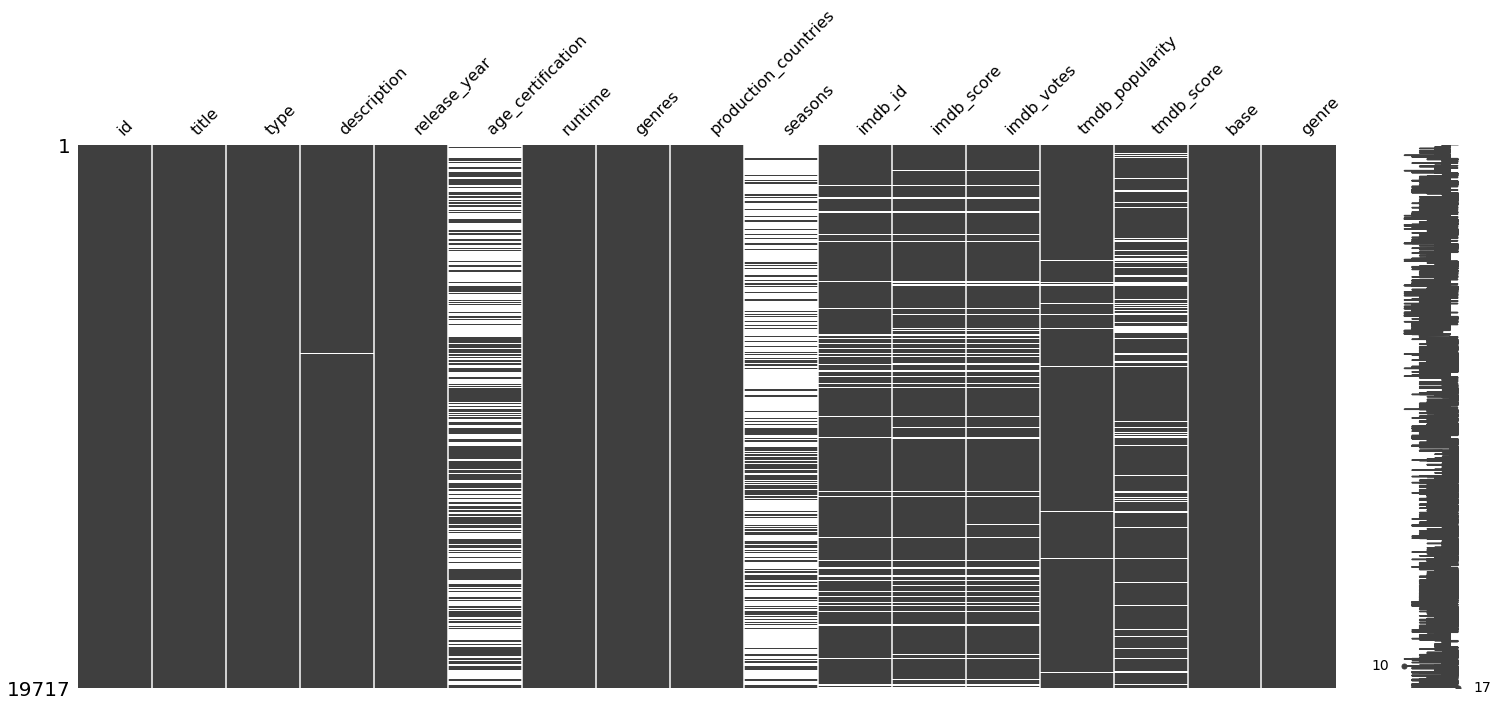

In [73]:
import missingno as msno

msno.matrix(df);

In [74]:
df[["seasons", "runtime", "imdb_score", "imdb_votes", "tmdb_popularity", "tmdb_score"]].describe()

,seasons,runtime,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5750.000000,19717.000000,17794.000000,1.776800e+04,19139.000000,17249.000000
mean,3.001913,75.922554,6.464207,2.495645e+04,17.678189,6.599804
std,4.029310,37.488193,1.233012,1.015340e+05,99.053094,1.353310
min,1.000000,0.000000,1.000000,5.000000e+00,0.000011,0.500000
25%,1.000000,45.000000,5.700000,2.230000e+02,1.870000,5.900000
50%,2.000000,83.000000,6.600000,1.230500e+03,4.687000,6.700000
75%,3.000000,100.000000,7.300000,7.594000e+03,12.223500,7.500000
max,63.000000,268.000000,9.900000,2.294231e+06,9323.832000,10.000000


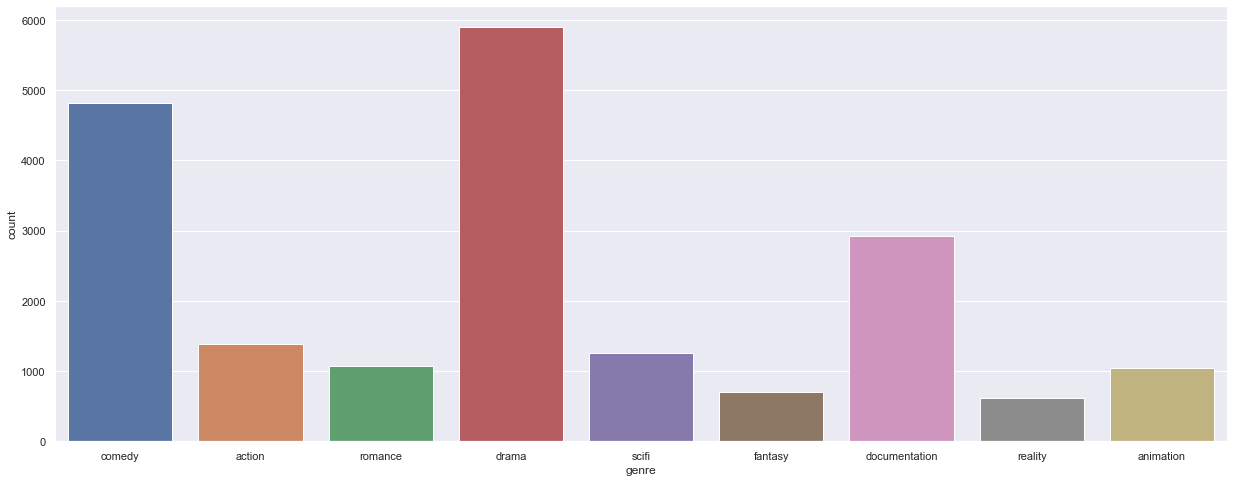

In [75]:
# Gráfico de barras com seaborn
sns.set(rc={'figure.figsize':(21,8)})

sns.countplot(x='genre', data=df)

plt.show()

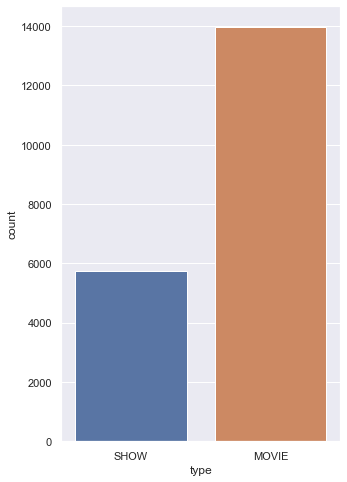

In [76]:
# Gráfico de barras com seaborn
sns.set(rc={'figure.figsize':(5,8)})

sns.countplot(x='type', data=df)

plt.show()

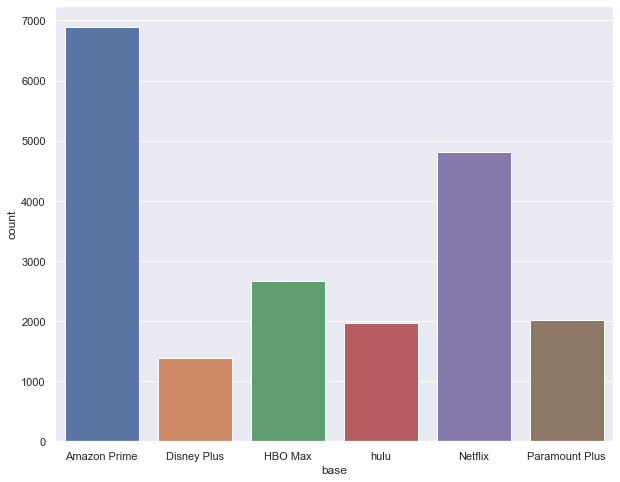

In [77]:
# Gráfico de barras com seaborn
sns.set(rc={'figure.figsize':(10,8)})

sns.countplot(x='base', data=df)

plt.show()

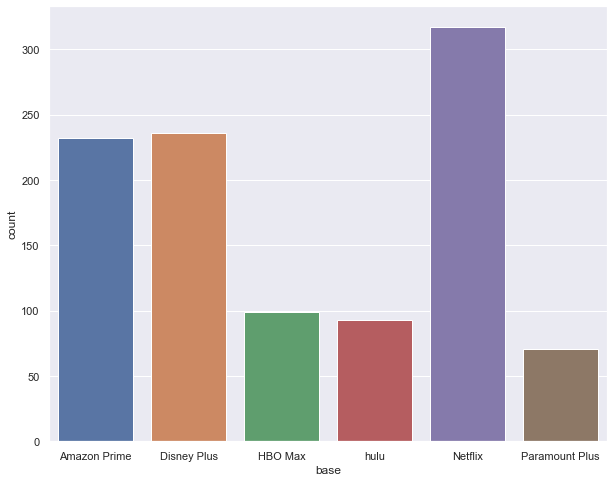

In [78]:
# Gráfico de barras com seaborn
sns.set(rc={'figure.figsize':(10,8)})

sns.countplot(x='base', data=df[df['genre']=='animation'])

plt.show()

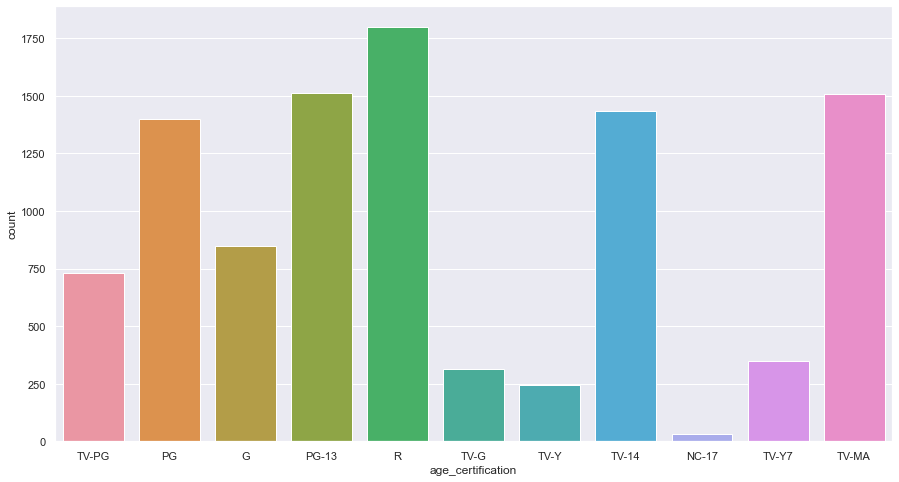

In [79]:
# Gráfico de barras com seaborn
sns.set(rc={'figure.figsize':(15,8)})

sns.countplot(x='age_certification', data=df)

plt.show()

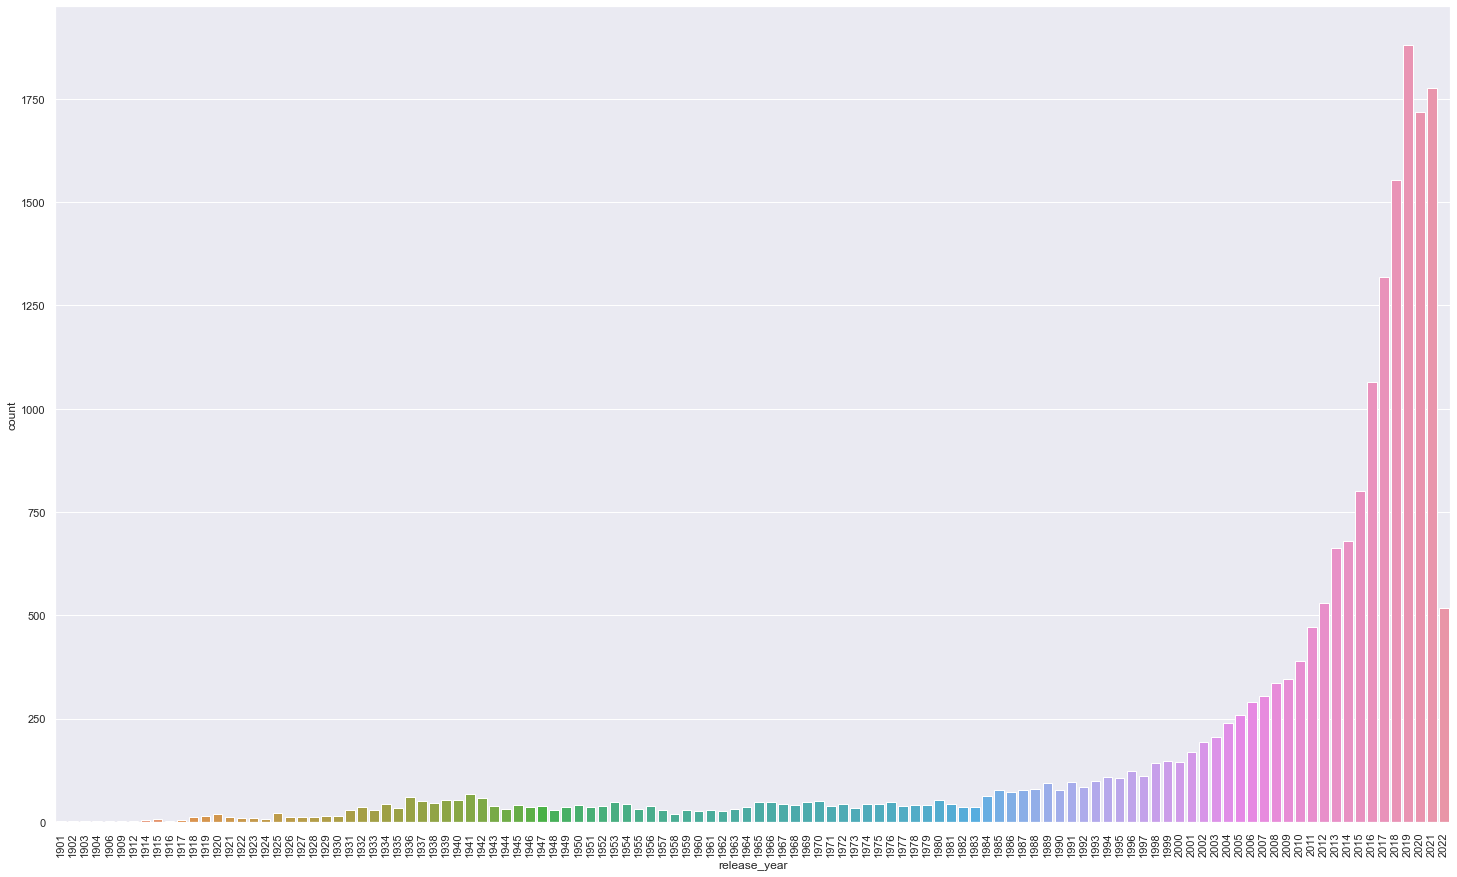

In [80]:
# Gráfico de barras com seaborn
sns.set(rc={'figure.figsize':(25,15)})#.set_xticklabels(rotation=30)

a = sns.countplot(x='release_year', data=df, order = df['release_year'].value_counts().sort_index().index)
a.set_xticklabels(a.get_xticklabels(), rotation=90)

plt.show()

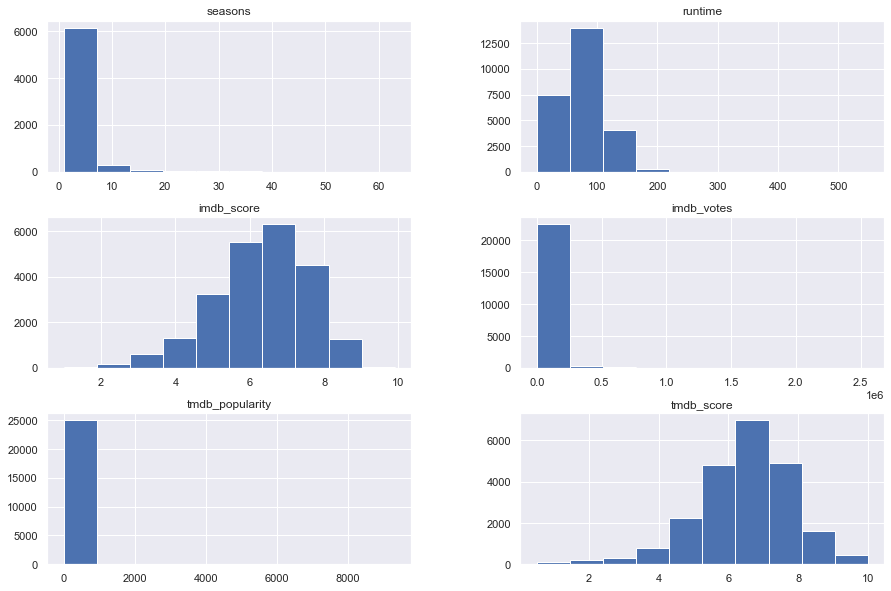

In [17]:
# Histograma para a variavel imc com matplotliib.

df[["seasons", "runtime", "imdb_score", "imdb_votes", "tmdb_popularity", "tmdb_score"]].hist(figsize=(15,10))
plt.show() 

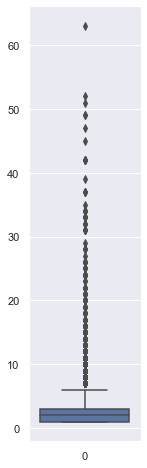

In [18]:
# Histograma para a variavel idade com seaborn.
# [["seasons", "runtime", "imdb_score", "imdb_votes", "tmdb_popularity", "tmdb_score"]]
plt.subplots( figsize=(2, 8))
sns.boxplot(data=df['seasons'])
plt.show()

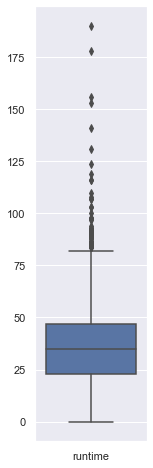

In [19]:
# Histograma para a variavel idade com seaborn.
# [["seasons", "runtime", "imdb_score", "imdb_votes", "tmdb_popularity", "tmdb_score"]]
plt.subplots( figsize=(2, 8))
sns.boxplot(data=df[df['type'] == 'SHOW'][['runtime']])
plt.show()

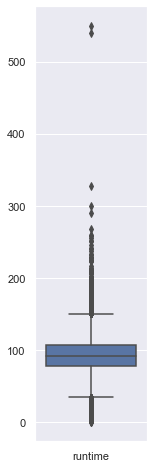

In [20]:
# Histograma para a variavel idade com seaborn.
# [["seasons", "runtime", "imdb_score", "imdb_votes", "tmdb_popularity", "tmdb_score"]]
plt.subplots( figsize=(2, 8))
sns.boxplot(data=df[df['type'] == 'MOVIE'][['runtime']])
plt.show()

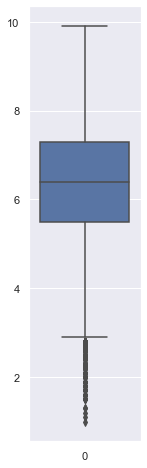

In [21]:
# Histograma para a variavel idade com seaborn.
# [["seasons", "runtime", "imdb_score", "imdb_votes", "tmdb_popularity", "tmdb_score"]]
plt.subplots( figsize=(2, 8))
sns.boxplot(data=df['imdb_score'])
plt.show()

In [36]:
df.genre.value_counts()

drama            5898
comedy           4820
documentation    2916
thriller         2172
action           1381
scifi            1256
romance          1078
animation        1048
horror           1019
crime             808
fantasy           706
western           683
reality           614
family            403
music             234
war               147
history           120
sport              35
european            8
Name: genre, dtype: int64

### Describe

In [88]:
df_describe = pd.DataFrame()
for base, df_temp in df.groupby('base'):#.describe()['imdb_score']
    df_describe[base] = df_temp.describe()['imdb_score']
    
df_describe.round(2)

,Amazon Prime,Disney Plus,HBO Max,Netflix,Paramount Plus,hulu
count,6235.00,1001.00,2380.00,4436.00,1875.00,1867.00
mean,6.17,6.62,6.93,6.56,6.21,6.79
std,1.29,1.08,1.06,1.16,1.26,1.16
min,1.20,1.60,1.50,1.60,1.70,1.00
25%,5.40,5.90,6.30,5.90,5.40,6.10
50%,6.30,6.60,7.10,6.70,6.30,6.90
75%,7.10,7.40,7.70,7.40,7.10,7.70
max,9.90,9.70,9.40,9.50,9.40,9.50


### Boxplot

In [212]:
colors = {'Amazon Prime':'#00A8E1',
          'Disney Plus':'#113CCF',
          'HBO Max':'#5822b4',
          'hulu':'#66aa33',
          'Netflix':'#E50914',
          'Paramount Plus':'#11518a'
}

#### Boxplot Geral

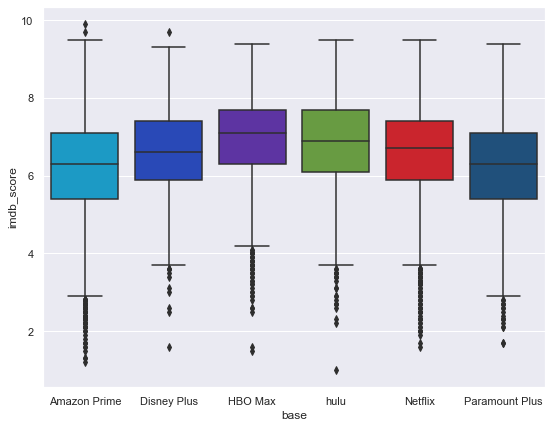

In [214]:
# Plotar o boxplot de uma variável em relação as classes com seaborn.

plt.subplots( figsize=(9, 7))
sns.boxplot(x='base', y='imdb_score', data=df, palette=list(colors.values()))
plt.show()

#### Boxplot Por Gênero

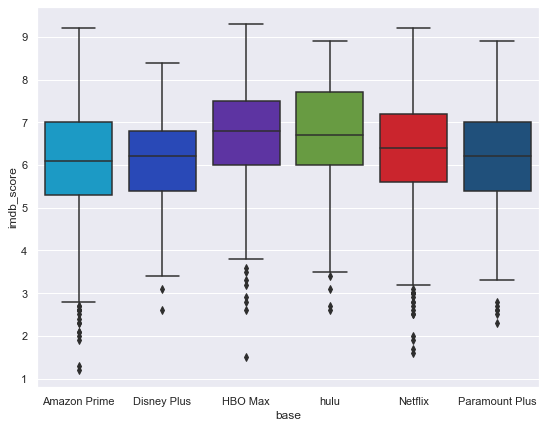

In [215]:
# Plotar o boxplot de uma variável em relação as classes com seaborn.

plt.subplots( figsize=(9, 7))
sns.boxplot(x='base', y='imdb_score', data=df[df['genre'] == 'comedy'], palette=list(colors.values()))
plt.show()

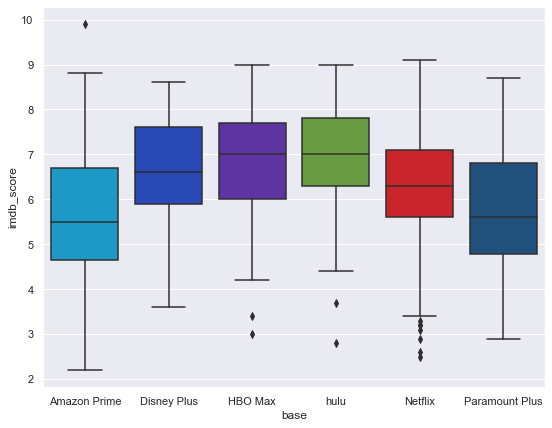

In [216]:
# Plotar o boxplot de uma variável em relação as classes com seaborn.

plt.subplots( figsize=(9, 7))
sns.boxplot(x='base', y='imdb_score', data=df[df['genre'] == 'action'], palette=list(colors.values()))
plt.show()

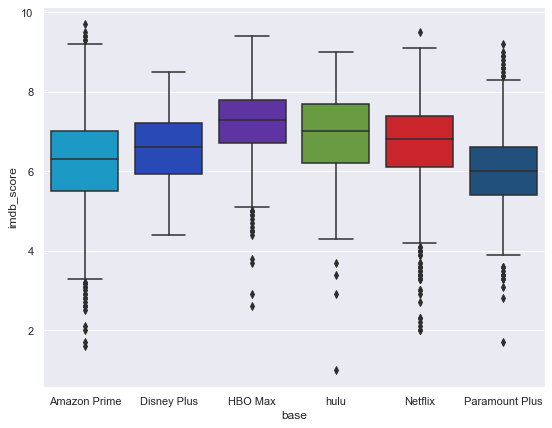

In [217]:
# Plotar o boxplot de uma variável em relação as classes com seaborn.

plt.subplots( figsize=(9, 7))
sns.boxplot(x='base', y='imdb_score', data=df[df['genre']=='drama'], palette=list(colors.values()))
plt.show()

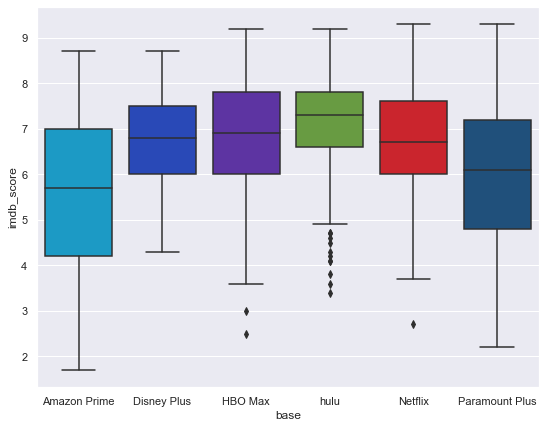

In [218]:
# Plotar o boxplot de uma variável em relação as classes com seaborn.

plt.subplots( figsize=(9, 7))
sns.boxplot(x='base', y='imdb_score', data=df[df['genre']=='scifi'], palette=list(colors.values()))
plt.show()

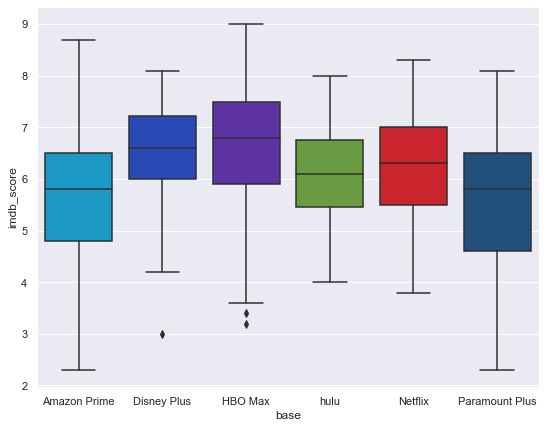

In [219]:
# Plotar o boxplot de uma variável em relação as classes com seaborn.

plt.subplots( figsize=(9, 7))
sns.boxplot(x='base', y='imdb_score', data=df[df['genre']=='fantasy'], palette=list(colors.values()))
plt.show()

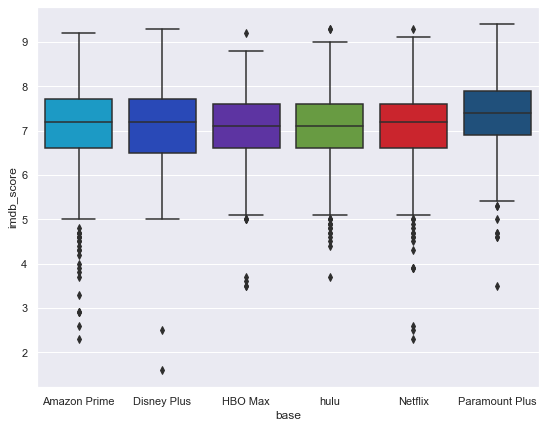

In [220]:
# Plotar o boxplot de uma variável em relação as classes com seaborn.

plt.subplots( figsize=(9, 7))
sns.boxplot(x='base', y='imdb_score', data=df[df['genre']=='documentation'], palette=list(colors.values()))
plt.show()

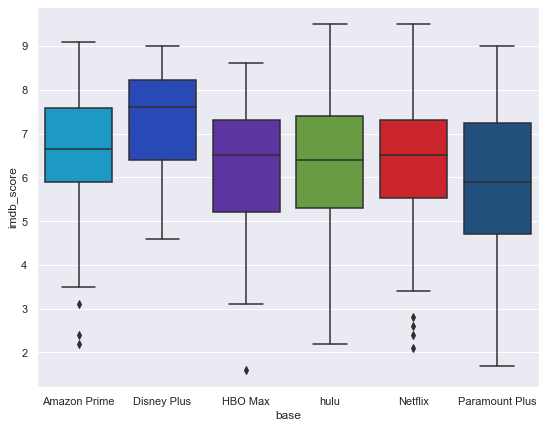

In [221]:
# Plotar o boxplot de uma variável em relação as classes com seaborn.

plt.subplots( figsize=(9, 7))
sns.boxplot(x='base', y='imdb_score', data=df[df['genre']=='reality'], palette=list(colors.values()))
plt.show()

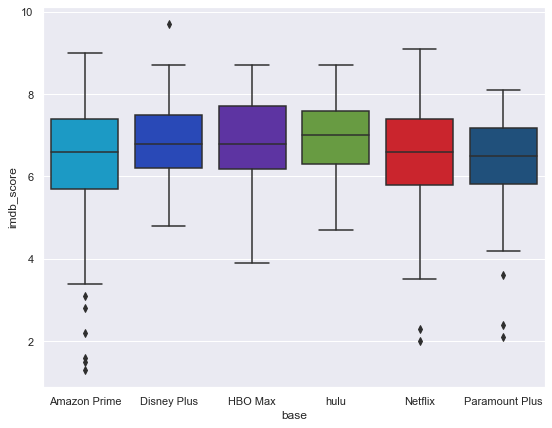

In [222]:
# Plotar o boxplot de uma variável em relação as classes com seaborn.

plt.subplots( figsize=(9, 7))
sns.boxplot(x='base', y='imdb_score', data=df[df['genre']=='animation'], palette=list(colors.values()))
plt.show()

### Histograma IMDb Score

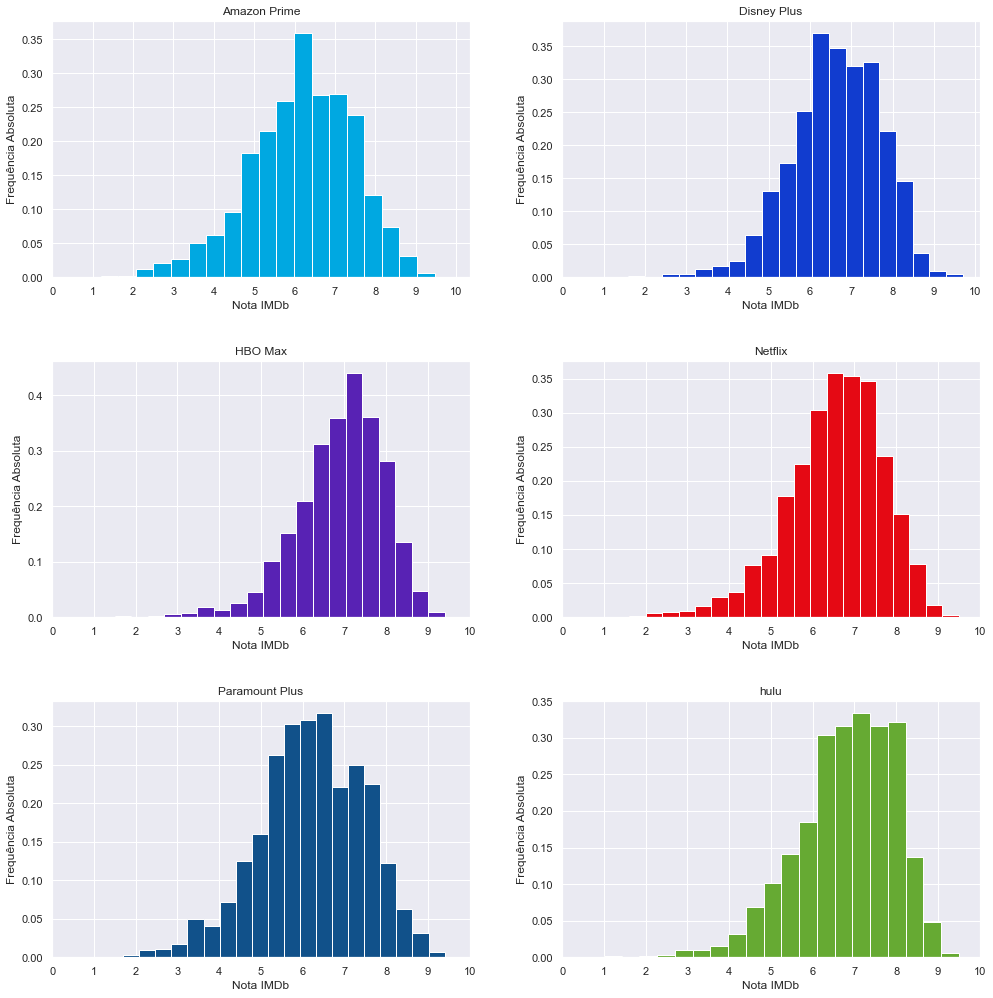

In [356]:
f, axes = plt.subplots(3, 2, figsize=(15, 15))
f.tight_layout(pad=5.0)

for group, ax in zip(df.groupby('base'), axes.reshape(-1)):
    base = group[0]
    df_temp = group[1]
    
    ax.hist(df_temp['imdb_score'].dropna(), 20, density=True, color=colors[base])
    ax.set_title(base)
    ax.set_xticks(list(range(11)))
    ax.set_ylabel('Frequência Absoluta')
    ax.set_xlabel('Nota IMDb')

---

### Teste De Normalidade

In [231]:
from scipy.stats import wilcoxon #Biblioteca que implementas métodos estatísticos
from scipy.stats import kstest
from scipy.stats import ttest_ind
from scipy.stats import shapiro

#### Kolmogorov–Smirnov

In [261]:
df_ks_norm = pd.DataFrame(index=['p-value'])
for base, df_temp in df.groupby('base'):
    alpha = 0.05
    k2, p = kstest(df_temp['imdb_score'].dropna().sample(1000),'norm')
    df_ks_norm[base] = p

df_ks_norm.T

,p-value
Amazon Prime,0.0
Disney Plus,0.0
HBO Max,0.0
Netflix,0.0
Paramount Plus,0.0
hulu,0.0


#### Shapiro-Wilker

In [312]:
df_shapiro = pd.DataFrame(index=['p-value'])
for base, df_temp in df.groupby('base'):
    alpha = 0.05
    k2, p = shapiro(df_temp['imdb_score'].dropna().sample(200))
    df_ks_norm[base] = p
    
df_ks_norm.T.round(2)

,p-value
Amazon Prime,0.03
Disney Plus,0.08
HBO Max,0.13
Netflix,0.01
Paramount Plus,0.03
hulu,0.02


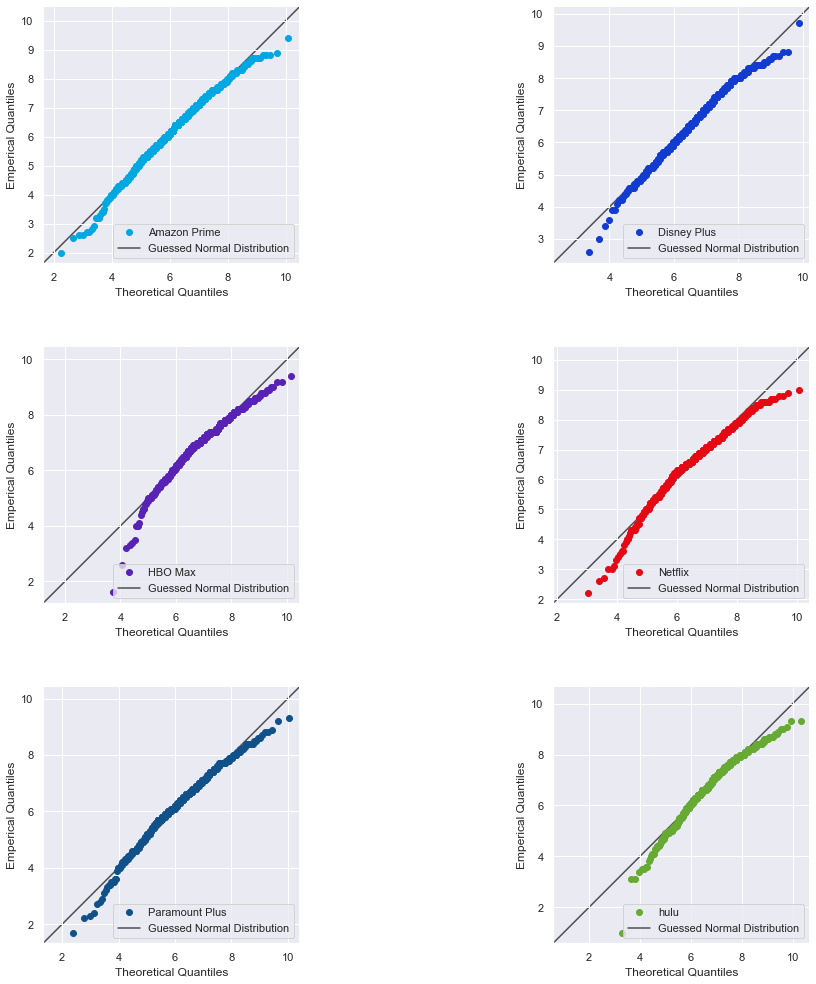

In [456]:
from matplotlib import pyplot
import probscale
import numpy
import seaborn

def equality_line(ax, label=None):
    limits = [
        numpy.min([ax.get_xlim(), ax.get_ylim()]),
        numpy.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.set_xlim(limits)
    ax.set_ylim(limits)
    ax.plot(limits, limits, 'k-', alpha=0.75, zorder=0, label=label)

  
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.tight_layout(pad=5.0)

for group, ax in zip(df.groupby('base'), axes.reshape(-1)):
    base = group[0]
    df_temp = group[1]
    
    ax.set_aspect('equal')
    
    norm = stats.norm(loc=df_temp['imdb_score'].dropna().mean(), scale=df_temp['imdb_score'].dropna().std())  
    
    common_opts = dict(
        plottype='qq',
        probax='x',
        problabel='Theoretical Quantiles',
        datalabel='Emperical Quantiles',
        scatter_kws=dict(label=base)
    )

    fig = probscale.probplot(df_temp['imdb_score'].dropna().sample(500), ax=ax, dist=norm, **common_opts, color=colors[base])

    equality_line(ax, label='Guessed Normal Distribution')
    ax.legend(loc='lower right')
    seaborn.despine()

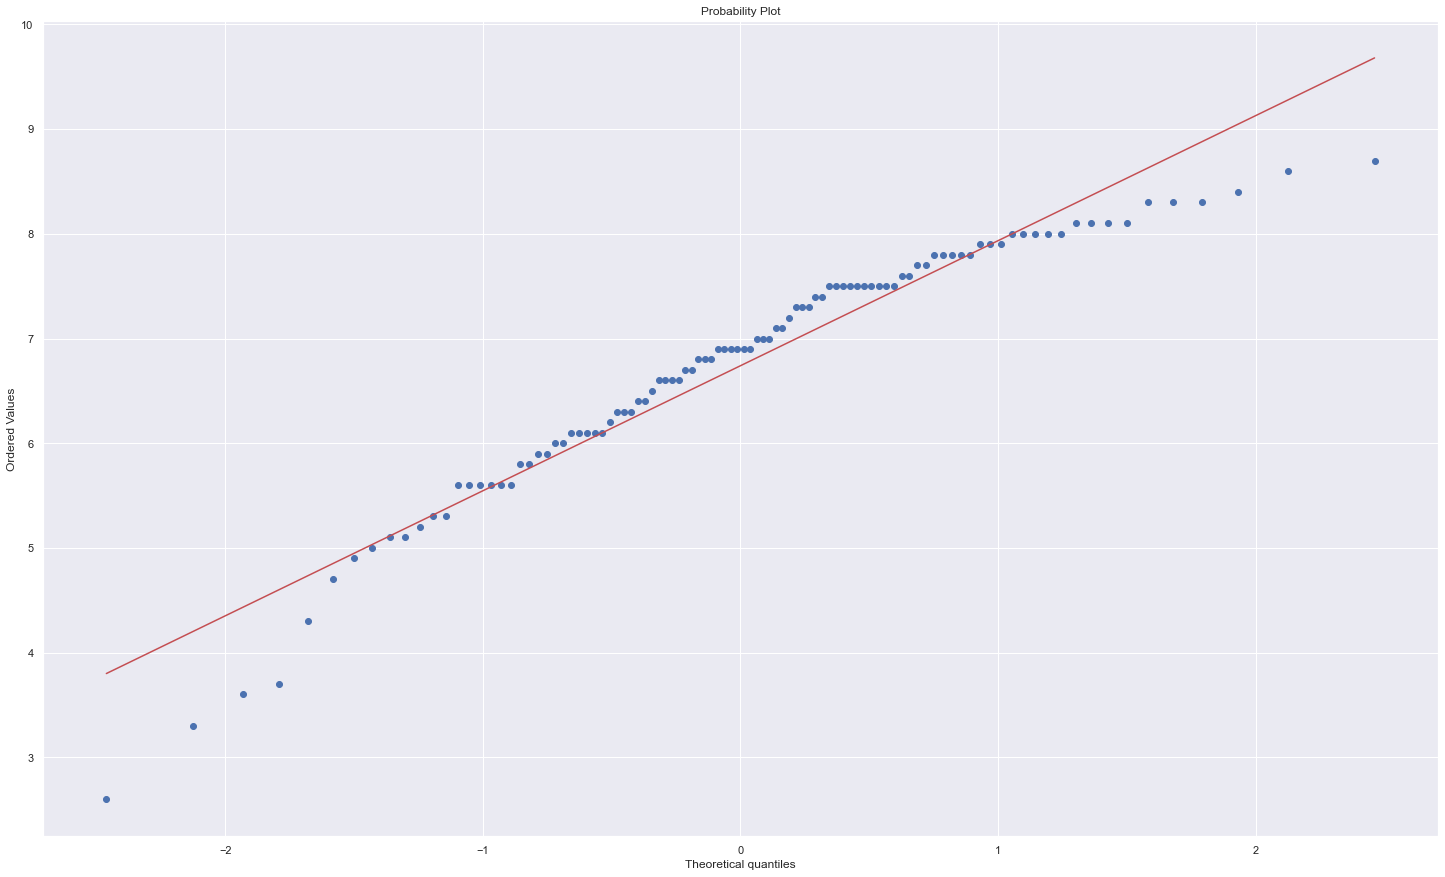

In [313]:
import pylab
import scipy.stats as stats

stats.probplot(df_temp['imdb_score'].dropna().sample(100), dist="norm", plot=pylab)
pylab.show()

### Teste De Hipotese

In [358]:
def cdf(sample, x, sort = False):
    # Sorts the sample, if unsorted
    if sort:
        sample.sort()
    # Counts how many observations are below x
    cdf = sum(sample <= x)
    # Divides by the total number of observations
    cdf = cdf / len(sample)
    return cdf

In [359]:
def ks_norm(sample):
    # Sorts the sample
    sample.sort()
    # Evaluates the KS statistic
    D_ks = [] # KS Statistic list
    for x in sample:
        cdf_normal = stats.norm.cdf(x = x, loc = 0, scale = 1)
        cdf_sample = cdf(sample = sample, x  = x)
        D_ks.append(abs(cdf_normal - cdf_sample))
    ks_stat = max(D_ks)
    # Calculates the P-Value based on the two-sided test
    # The P-Value comes from the KS Distribution Survival Function (SF = 1-CDF)
    p_value = stats.kstwo.sf(ks_stat, len(sample))
    return {"ks_stat": ks_stat, "p_value" : p_value}

In [360]:
def ks_2samp(sample1, sample2):
    # Gets all observations
    observations = np.concatenate((sample1, sample2))
    observations.sort()
    # Sorts the samples
    sample1.sort()
    sample2.sort()
    # Evaluates the KS statistic
    D_ks = [] # KS Statistic list
    for x in observations:
        cdf_sample1 = cdf(sample = sample1, x  = x)
        cdf_sample2 = cdf(sample = sample2, x  = x)
        D_ks.append(abs(cdf_sample1 - cdf_sample2))
    ks_stat = max(D_ks)
    # Calculates the P-Value based on the two-sided test
    # The P-Value comes from the KS Distribution Survival Function (SF = 1-CDF)
    m, n = float(len(sample1)), float(len(sample2))
    en = m * n / (m + n)
    p_value = stats.kstwo.sf(ks_stat, np.round(en))
    return {"ks_stat": ks_stat, "p_value" : p_value}

In [368]:
# #Hipotese nula: Os dados seguem uma mesma distribuição
# #Hipotese alternativa: Os dados não seguem uma mesma distribuição

# alpha = 0.05
# lista = []

# distribuicao_igual = []
# distribuicao_diferente = []

# for base_a in df.base.unique():
#     lista.append(base_a)
#     for base_b in df[~df['base'].isin(lista)].base.unique():
#         if base_a == base_b:
#             continue
#         p = ks_2samp(np.array(df[df['base'] == base_a]['imdb_score'].dropna().sample(1000)), 
#                  np.array(df[df['base'] == base_b]['imdb_score'].dropna().sample(1000)))['p_value']
        
        
        
#         if p < alpha:
#             distribuicao_diferente.append((base_a, base_b))
#         else:
#             distribuicao_igual.append((base_a, base_b))
        

In [436]:
#Hipotese nula: Os dados seguem uma mesma distribuição
#Hipotese alternativa: Os dados não seguem uma mesma distribuição
df_ks_2samp = pd.DataFrame(index=[list(colors.keys())], columns=list(colors.keys()))
df_ks_2samp_s = pd.DataFrame(index=[list(colors.keys())], columns=list(colors.keys()))

alpha = 0.05
lista = []

distribuicao_igual = []
distribuicao_diferente = []

for base_a in df.base.unique():
    lista.append(base_a)
    for base_b in df[~df['base'].isin(lista)].base.unique():
#         if base_a == base_b:
#             continue
        statisitc, p = kstest(np.array(df[df['base'] == base_a]['imdb_score'].dropna().sample(1000)), 
                 np.array(df[df['base'] == base_b]['imdb_score'].dropna().sample(1000)))
#         print(base_a, '-', base_b)

        df_ks_2samp.loc[base_a,base_b] = p
        df_ks_2samp.loc[base_b,base_a] = p
        
        df_ks_2samp_s.loc[base_a,base_b] = statisitc
        df_ks_2samp_s.loc[base_b,base_a] = statisitc
        
        if p < alpha:
#             print("A Hipótese Nula pode ser rejeitada")
            distribuicao_diferente.append((base_a, base_b))
        else:
#             print("A hipótese nula não pode ser rejeitada")
            distribuicao_igual.append((base_a, base_b))

df_ks_2samp.fillna(1).round(2)

,Amazon Prime,Disney Plus,HBO Max,hulu,Netflix,Paramount Plus
Amazon Prime,1.00,0.00,0.00,0.00,0.00,0.72
Disney Plus,0.00,1.00,0.00,0.00,0.54,0.00
HBO Max,0.00,0.00,1.00,0.01,0.00,0.00
hulu,0.00,0.00,0.01,1.00,0.00,0.00
Netflix,0.00,0.54,0.00,0.00,1.00,0.00
Paramount Plus,0.72,0.00,0.00,0.00,0.00,1.00


In [438]:
df_ks_2samp_s.fillna(0).round(2)

,Amazon Prime,Disney Plus,HBO Max,hulu,Netflix,Paramount Plus
Amazon Prime,0.00,0.17,0.26,0.22,0.15,0.03
Disney Plus,0.17,0.00,0.13,0.10,0.04,0.18
HBO Max,0.26,0.13,0.00,0.08,0.14,0.28
hulu,0.22,0.10,0.08,0.00,0.10,0.22
Netflix,0.15,0.04,0.14,0.10,0.00,0.16
Paramount Plus,0.03,0.18,0.28,0.22,0.16,0.00


In [431]:
distribuicao_igual

[('Amazon Prime', 'Paramount Plus'), ('Disney Plus', 'Netflix')]

In [432]:
distribuicao_diferente

[('Amazon Prime', 'Disney Plus'),
 ('Amazon Prime', 'HBO Max'),
 ('Amazon Prime', 'hulu'),
 ('Amazon Prime', 'Netflix'),
 ('Disney Plus', 'HBO Max'),
 ('Disney Plus', 'hulu'),
 ('Disney Plus', 'Paramount Plus'),
 ('HBO Max', 'hulu'),
 ('HBO Max', 'Netflix'),
 ('HBO Max', 'Paramount Plus'),
 ('hulu', 'Netflix'),
 ('hulu', 'Paramount Plus'),
 ('Netflix', 'Paramount Plus')]

{'ks_stat': 0.034, 'p_value': 0.597671517975962}


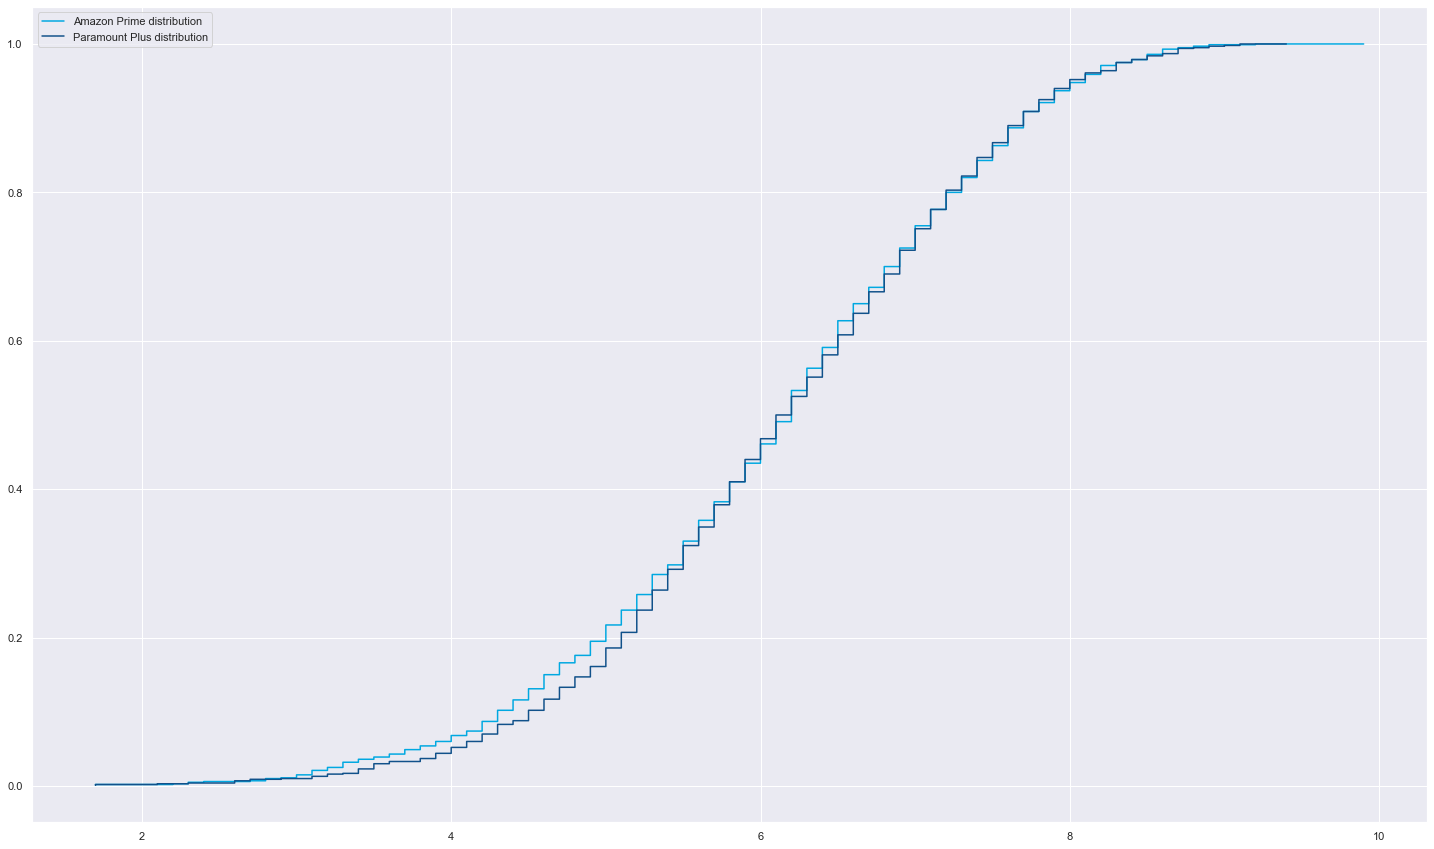

In [435]:
sample_1 = np.array(df[df['base'] == 'Amazon Prime']['imdb_score'].dropna().sample(1000))
sample_1.sort()

cdf_1 = [cdf(sample_1, x) for x in sample_1]

sample_2 = np.array(df[df['base'] == 'Paramount Plus']['imdb_score'].dropna().sample(1000))
sample_2.sort()

cdf_2 = [cdf(sample_2, x) for x in sample_2]

print(ks_2samp(sample_1, sample_2))

plt.step(
    sample_1,
    cdf_1,
    label='Amazon Prime distribution',
    color=colors['Amazon Prime']
)


plt.step(
    sample_2,
    cdf_2,
    label='Paramount Plus distribution',
    color=colors['Paramount Plus']
)
plt.legend()
plt.show()

{'ks_stat': 0.28400000000000003, 'p_value': 3.5328812778206024e-36}


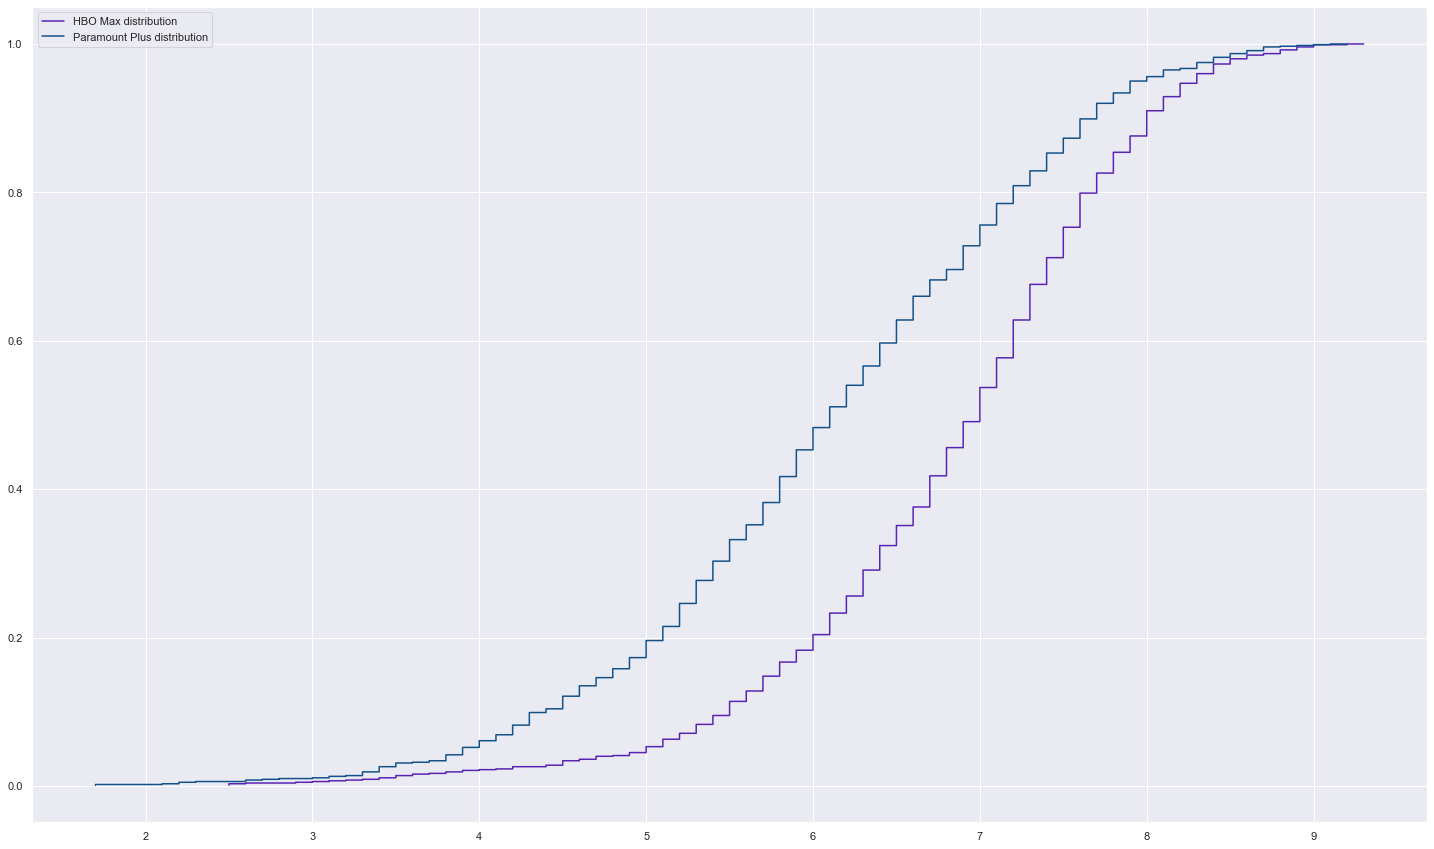

In [439]:
sample_1 = np.array(df[df['base'] == 'HBO Max']['imdb_score'].dropna().sample(1000))
sample_1.sort()

cdf_1 = [cdf(sample_1, x) for x in sample_1]

sample_2 = np.array(df[df['base'] == 'Paramount Plus']['imdb_score'].dropna().sample(1000))
sample_2.sort()

cdf_2 = [cdf(sample_2, x) for x in sample_2]

print(ks_2samp(sample_1, sample_2))

plt.step(
    sample_1,
    cdf_1,
    label='HBO Max distribution',
    color=colors['HBO Max']
)


plt.step(
    sample_2,
    cdf_2,
    label='Paramount Plus distribution',
    color=colors['Paramount Plus']
)
plt.legend()
plt.show()